In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
#load the dataset
train_df=pd.read_csv('/content/Train.csv')
test_df=pd.read_csv('/content/Test.csv')


In [3]:
train_df

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,id_27290,58.0,admin.,married,secondary,no,567.0,yes,no,cellular,2,feb,99.0,2.0,265.0,3,other,0
31643,id_20428,51.0,management,married,tertiary,no,1072.0,no,no,unknown,20,jun,31.0,7.0,NaN,0,unknown,0
31644,id_44679,41.0,unemployed,married,primary,no,242.0,yes,no,unknown,23,may,89.0,2.0,NaN,0,unknown,0
31645,id_4841,48.0,services,married,secondary,no,2699.0,no,no,cellular,11,aug,216.0,6.0,NaN,0,unknown,0


In [4]:
test_df

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome
0,id_17231,55.0,retired,married,tertiary,no,7136.0,no,no,cellular,13,aug,90.0,2.0,NaN,0,unknown
1,id_34508,24.0,blue-collar,single,secondary,no,179.0,yes,no,cellular,18,may,63.0,2.0,NaN,0,unknown
2,id_44504,46.0,technician,divorced,secondary,no,143.0,no,no,cellular,8,jul,208.0,1.0,NaN,0,unknown
3,id_174,56.0,housemaid,single,unknown,no,6023.0,no,no,unknown,6,jun,34.0,1.0,NaN,0,unknown
4,id_2115,62.0,retired,married,secondary,no,2913.0,no,no,cellular,12,apr,127.0,1.0,188.0,1,success
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,id_42406,29.0,management,single,tertiary,no,717.0,yes,no,cellular,15,jun,94.0,1.0,NaN,0,unknown
13560,id_14483,NaN,blue-collar,married,secondary,no,604.0,yes,no,telephone,10,jul,155.0,1.0,NaN,0,unknown
13561,id_43066,45.0,blue-collar,married,primary,no,237.0,yes,no,unknown,16,may,231.0,4.0,NaN,0,unknown
13562,id_18375,52.0,admin.,married,primary,no,241.0,yes,no,cellular,13,may,243.0,2.0,299.0,5,failure


DATA PRE-PROCESSING AND EDA


In [5]:
#check for columns in train dataset
train_df.columns

Index(['id', 'customer_age', 'job_type', 'marital', 'education', 'default',
       'balance', 'housing_loan', 'personal_loan', 'communication_type',
       'day_of_month', 'month', 'last_contact_duration',
       'num_contacts_in_campaign', 'days_since_prev_campaign_contact',
       'num_contacts_prev_campaign', 'prev_campaign_outcome',
       'term_deposit_subscribed'],
      dtype='object')

In [6]:
#check for columns in test dataset
test_df.columns

Index(['id', 'customer_age', 'job_type', 'marital', 'education', 'default',
       'balance', 'housing_loan', 'personal_loan', 'communication_type',
       'day_of_month', 'month', 'last_contact_duration',
       'num_contacts_in_campaign', 'days_since_prev_campaign_contact',
       'num_contacts_prev_campaign', 'prev_campaign_outcome'],
      dtype='object')

In [7]:
#check for size of train dataset
train_df.shape

(31647, 18)

In [8]:
#check for size of test dataset
test_df.shape

(13564, 17)

In [9]:
#check for information of train dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                31647 non-null  object 
 1   customer_age                      31028 non-null  float64
 2   job_type                          31647 non-null  object 
 3   marital                           31497 non-null  object 
 4   education                         31647 non-null  object 
 5   default                           31647 non-null  object 
 6   balance                           31248 non-null  float64
 7   housing_loan                      31647 non-null  object 
 8   personal_loan                     31498 non-null  object 
 9   communication_type                31647 non-null  object 
 10  day_of_month                      31647 non-null  int64  
 11  month                             31647 non-null  object 
 12  last

In [10]:
#check for information of test dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                13564 non-null  object 
 1   customer_age                      13294 non-null  float64
 2   job_type                          13564 non-null  object 
 3   marital                           13483 non-null  object 
 4   education                         13564 non-null  object 
 5   default                           13564 non-null  object 
 6   balance                           13383 non-null  float64
 7   housing_loan                      13564 non-null  object 
 8   personal_loan                     13490 non-null  object 
 9   communication_type                13564 non-null  object 
 10  day_of_month                      13564 non-null  int64  
 11  month                             13564 non-null  object 
 12  last

In [11]:
#check for overview of train dataset
train_df.describe()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,term_deposit_subscribed
count,31028.000000,31248.000000,31647.000000,31336.000000,31535.000000,5816.000000,31647.000000,31647.000000
mean,40.439216,1368.112615,15.818561,256.184038,2.776629,224.995186,0.591620,0.107246
std,10.751392,3085.342417,8.322970,256.181479,3.153293,114.991828,2.499675,0.309430
min,18.000000,-8020.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,32.000000,72.000000,8.000000,103.000000,1.000000,133.000000,0.000000,0.000000
50%,39.000000,449.000000,16.000000,179.000000,2.000000,195.000000,0.000000,0.000000
75%,48.000000,1413.000000,21.000000,315.250000,3.000000,329.000000,0.000000,0.000000
max,97.000000,102128.000000,31.000000,4900.000000,63.000000,871.000000,275.000000,1.000000


In [12]:
#check for overview of test dataset
test_df.describe()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign
count,13294.000000,13383.000000,13564.000000,13442.000000,13519.000000,2441.000000,13564.000000
mean,40.450429,1341.405514,15.778089,261.171031,2.730971,223.582958,0.553966
std,10.747881,2839.670990,8.321562,261.195560,2.941338,116.196526,1.762402
min,18.000000,-6849.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,32.000000,70.500000,8.000000,102.000000,1.000000,131.000000,0.000000
50%,39.000000,447.000000,16.000000,182.000000,2.000000,194.000000,0.000000
75%,48.000000,1466.000000,21.000000,325.000000,3.000000,323.000000,0.000000
max,94.000000,71187.000000,31.000000,3863.000000,50.000000,842.000000,38.000000


In [13]:
#check for null values on train dataset
train_df.isnull().sum()

id                                      0
customer_age                          619
job_type                                0
marital                               150
education                               0
default                                 0
balance                               399
housing_loan                            0
personal_loan                         149
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 311
num_contacts_in_campaign              112
days_since_prev_campaign_contact    25831
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
term_deposit_subscribed                 0
dtype: int64

In [14]:
#check for null values on test dataset
test_df.isnull().sum()

id                                      0
customer_age                          270
job_type                                0
marital                                81
education                               0
default                                 0
balance                               181
housing_loan                            0
personal_loan                          74
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 122
num_contacts_in_campaign               45
days_since_prev_campaign_contact    11123
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
dtype: int64

In [15]:
#check for unique values on train dataset
train_df.nunique()

id                                  31647
customer_age                           77
job_type                               12
marital                                 3
education                               4
default                                 2
balance                              6563
housing_loan                            2
personal_loan                           2
communication_type                      3
day_of_month                           31
month                                  12
last_contact_duration                1447
num_contacts_in_campaign               46
days_since_prev_campaign_contact      511
num_contacts_prev_campaign             41
prev_campaign_outcome                   4
term_deposit_subscribed                 2
dtype: int64

In [16]:
#check for unique values on test dataset
test_df.nunique()

id                                  13564
customer_age                           73
job_type                               12
marital                                 3
education                               4
default                                 2
balance                              4414
housing_loan                            2
personal_loan                           2
communication_type                      3
day_of_month                           31
month                                  12
last_contact_duration                1186
num_contacts_in_campaign               38
days_since_prev_campaign_contact      417
num_contacts_prev_campaign             30
prev_campaign_outcome                   4
dtype: int64

In [17]:
# For numerical columns in train dataset, we can impute missing values with  median
train_df[['customer_age', 'balance', 'last_contact_duration', 'num_contacts_in_campaign', 'days_since_prev_campaign_contact']] = \
    train_df[['customer_age', 'balance', 'last_contact_duration', 'num_contacts_in_campaign', 'days_since_prev_campaign_contact']].fillna(test_df[['customer_age', 'balance', 'last_contact_duration', 'num_contacts_in_campaign', 'days_since_prev_campaign_contact']].median())

In [18]:
# Fill missing values in catogorical columns of train_df with the mode
train_df[['marital', 'personal_loan']] = train_df[['marital', 'personal_loan']].fillna(train_df[['marital', 'personal_loan']].mode().iloc[0])
train_df

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,194.0,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,194.0,0,unknown,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,194.0,0,unknown,0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,194.0,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,id_27290,58.0,admin.,married,secondary,no,567.0,yes,no,cellular,2,feb,99.0,2.0,265.0,3,other,0
31643,id_20428,51.0,management,married,tertiary,no,1072.0,no,no,unknown,20,jun,31.0,7.0,194.0,0,unknown,0
31644,id_44679,41.0,unemployed,married,primary,no,242.0,yes,no,unknown,23,may,89.0,2.0,194.0,0,unknown,0
31645,id_4841,48.0,services,married,secondary,no,2699.0,no,no,cellular,11,aug,216.0,6.0,194.0,0,unknown,0


In [19]:
train_df.isna().sum()

id                                  0
customer_age                        0
job_type                            0
marital                             0
education                           0
default                             0
balance                             0
housing_loan                        0
personal_loan                       0
communication_type                  0
day_of_month                        0
month                               0
last_contact_duration               0
num_contacts_in_campaign            0
days_since_prev_campaign_contact    0
num_contacts_prev_campaign          0
prev_campaign_outcome               0
term_deposit_subscribed             0
dtype: int64

In [20]:
# Drop 'id' column as it's not useful for modeling
train_df.drop('id', axis=1, inplace=True)
test_df.drop('id', axis=1, inplace=True)

In [21]:
# For numerical columns in test dataset, we can impute missing values with  median
test_df[['customer_age', 'balance', 'last_contact_duration', 'num_contacts_in_campaign', 'days_since_prev_campaign_contact']] = \
    test_df[['customer_age', 'balance',  'last_contact_duration', 'num_contacts_in_campaign', 'days_since_prev_campaign_contact']].fillna(test_df[['customer_age', 'balance',  'last_contact_duration', 'num_contacts_in_campaign', 'days_since_prev_campaign_contact']].median())

In [22]:
# Fill missing values in catogorical columns of test dataset with the mode
test_df[['marital', 'personal_loan']] = test_df[['marital', 'personal_loan']].fillna(train_df[['marital', 'personal_loan']].mode().iloc[0])
test_df

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome
0,55.0,retired,married,tertiary,no,7136.0,no,no,cellular,13,aug,90.0,2.0,194.0,0,unknown
1,24.0,blue-collar,single,secondary,no,179.0,yes,no,cellular,18,may,63.0,2.0,194.0,0,unknown
2,46.0,technician,divorced,secondary,no,143.0,no,no,cellular,8,jul,208.0,1.0,194.0,0,unknown
3,56.0,housemaid,single,unknown,no,6023.0,no,no,unknown,6,jun,34.0,1.0,194.0,0,unknown
4,62.0,retired,married,secondary,no,2913.0,no,no,cellular,12,apr,127.0,1.0,188.0,1,success
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,29.0,management,single,tertiary,no,717.0,yes,no,cellular,15,jun,94.0,1.0,194.0,0,unknown
13560,39.0,blue-collar,married,secondary,no,604.0,yes,no,telephone,10,jul,155.0,1.0,194.0,0,unknown
13561,45.0,blue-collar,married,primary,no,237.0,yes,no,unknown,16,may,231.0,4.0,194.0,0,unknown
13562,52.0,admin.,married,primary,no,241.0,yes,no,cellular,13,may,243.0,2.0,299.0,5,failure


In [23]:
test_df.isna().sum()

customer_age                        0
job_type                            0
marital                             0
education                           0
default                             0
balance                             0
housing_loan                        0
personal_loan                       0
communication_type                  0
day_of_month                        0
month                               0
last_contact_duration               0
num_contacts_in_campaign            0
days_since_prev_campaign_contact    0
num_contacts_prev_campaign          0
prev_campaign_outcome               0
dtype: int64

In [24]:
#outlier detection in train dataset
numeric_cols = ['customer_age','balance','day_of_month', 'last_contact_duration',
  'num_contacts_in_campaign', 'days_since_prev_campaign_contact','num_contacts_prev_campaign','term_deposit_subscribed' ]
def detect_outliers(train_df, cols, threshold=3):
    outliers = pd.DataFrame()
    for col in cols:
        z_scores = np.abs(stats.zscore(train_df[col]))
        outliers[col] = train_df[col][(z_scores > threshold)]
    return outliers

outliers_df = detect_outliers(train_df, numeric_cols)


In [25]:
#Replace outliers with the median or mean
for col in numeric_cols:
    median = train_df[col].median()
    train_df[col] = np.where(train_df[col].isin(outliers_df[col]), median, train_df[col])


In [26]:
#outlier detection in test dataset
numeric_cols = [ 'customer_age','balance','day_of_month', 'last_contact_duration', 'num_contacts_in_campaign', 'days_since_prev_campaign_contact',
  'num_contacts_prev_campaign']
def detect_outliers(test_df, cols, threshold=3):
    outliers = pd.DataFrame()
    for col in cols:
        z_scores = np.abs(stats.zscore(test_df[col]))
        outliers[col] = test_df[col][(z_scores > threshold)]
    return outliers

outliers_df = detect_outliers(test_df, numeric_cols)


In [27]:
# Replace outliers with the median
for col in numeric_cols:
    median = test_df[col].median()
    test_df[col] = np.where(test_df[col].isin(outliers_df[col]), median, test_df[col])

In [28]:
# Encode categorical variables using Label Encoding in train dataset
categorical_cols = ['job_type', 'marital', 'education', 'default', 'housing_loan', 'personal_loan', 'communication_type','month', 'prev_campaign_outcome']
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    train_df[col] = label_encoders[col].fit_transform(train_df[col])

In [29]:
# Encode categorical variables using Label Encoding in test dataset
categorical_cols = ['job_type', 'marital', 'education', 'default', 'housing_loan', 'personal_loan', 'communication_type','month', 'prev_campaign_outcome']
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    test_df[col] = label_encoders[col].fit_transform(test_df[col])

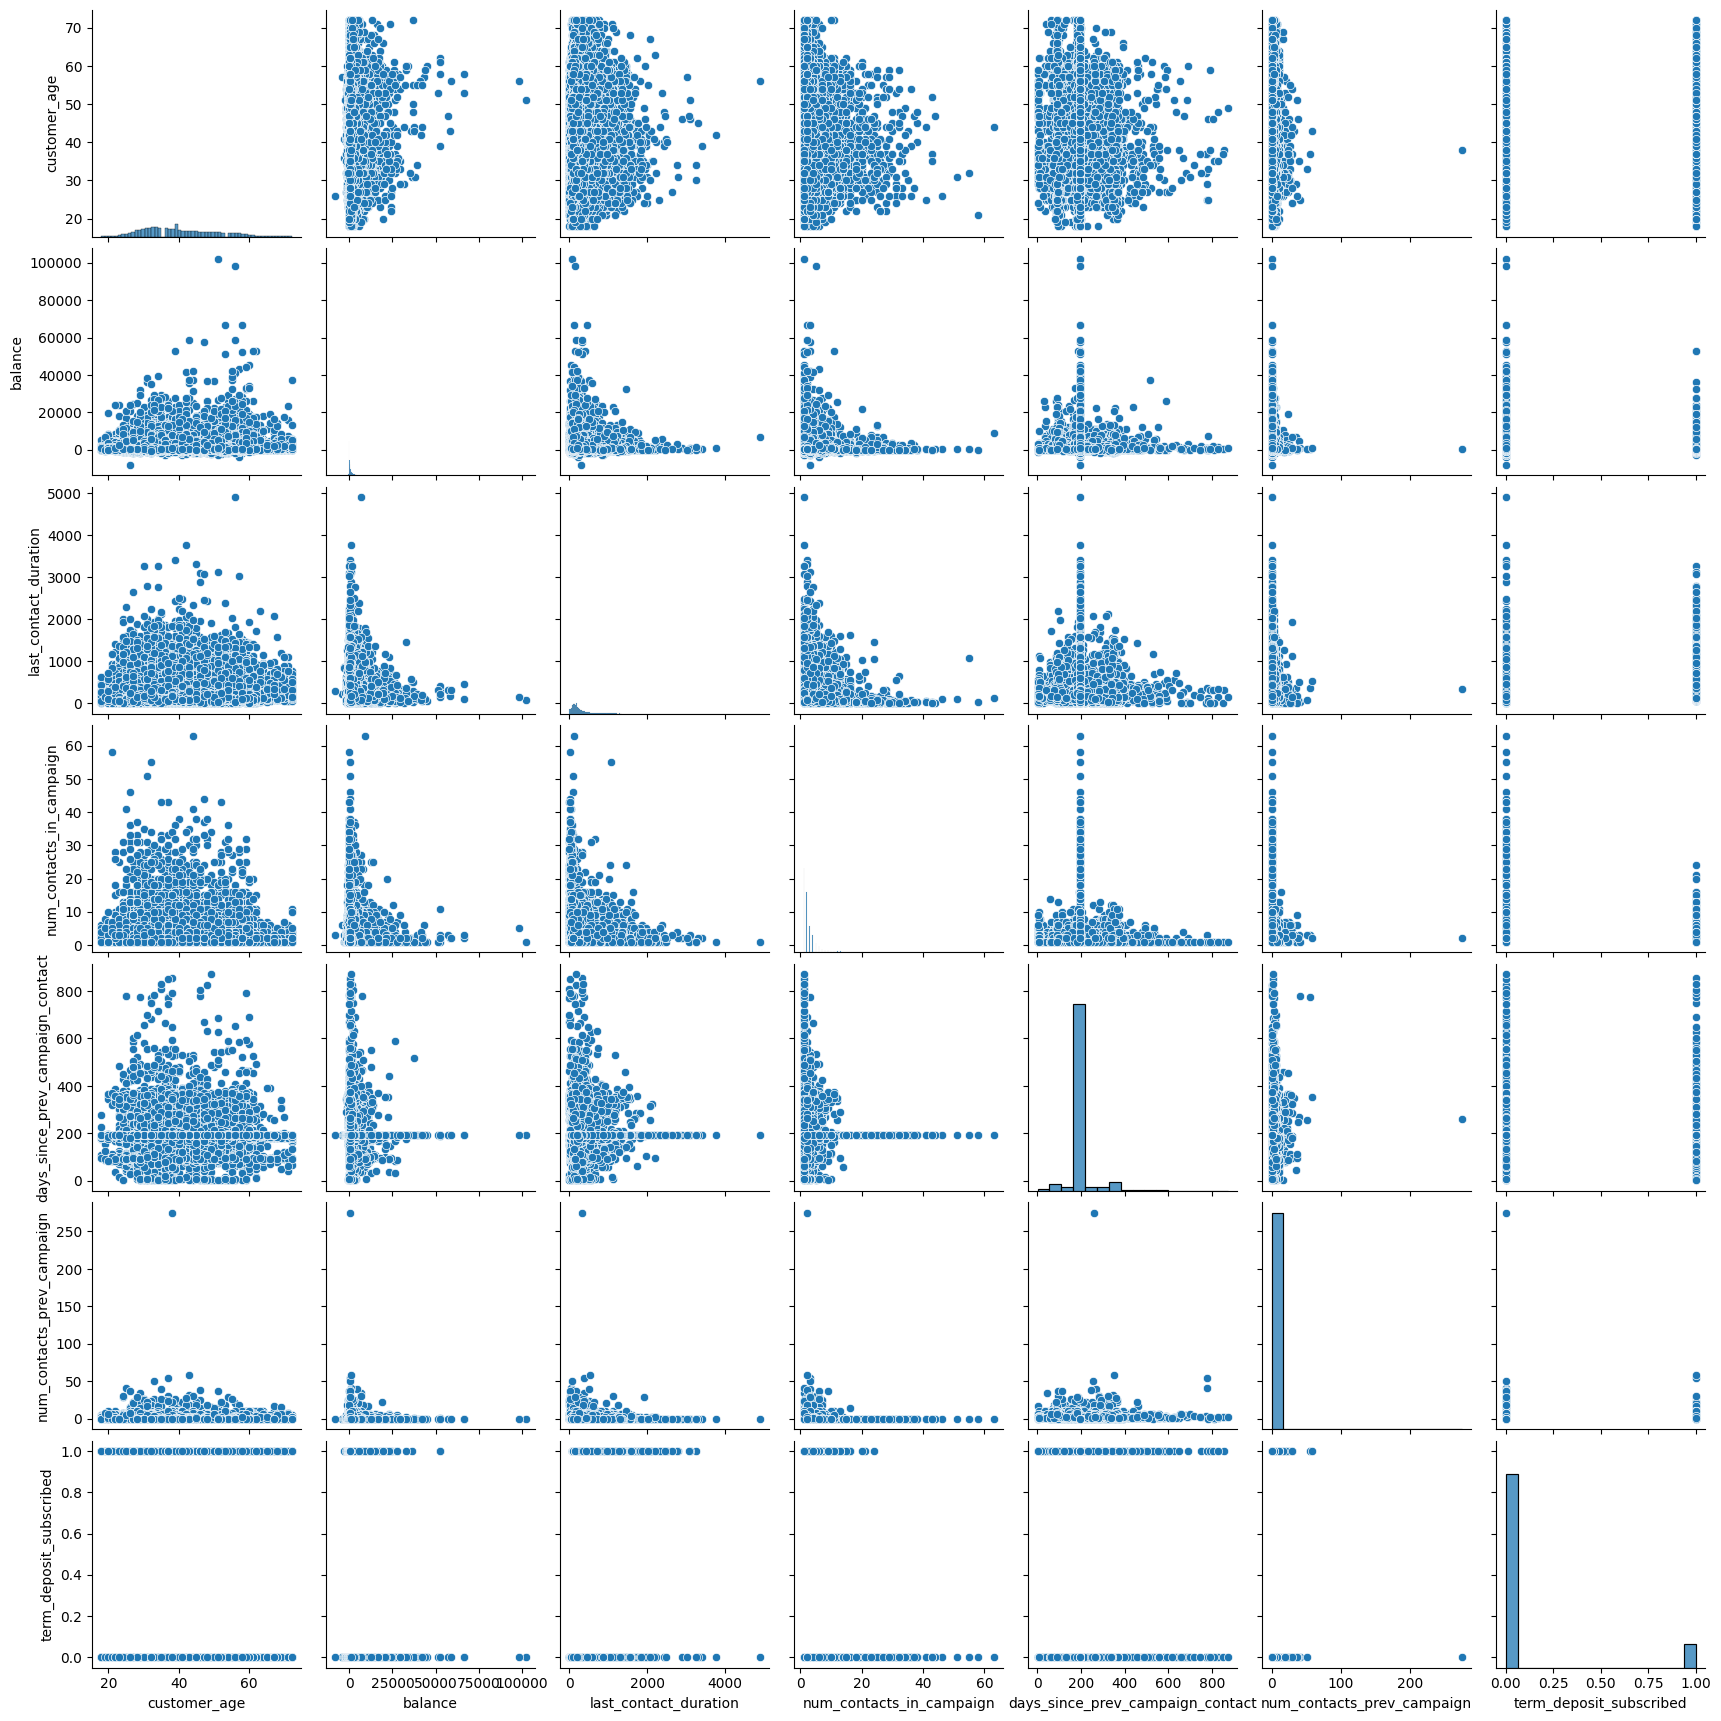

In [30]:
# Pairplot to visualize relationships between numerical variables of train dataset
sns.pairplot(train_df[['customer_age', 'balance', 'last_contact_duration', 'num_contacts_in_campaign', 'days_since_prev_campaign_contact', 'num_contacts_prev_campaign', 'term_deposit_subscribed']])
plt.show()

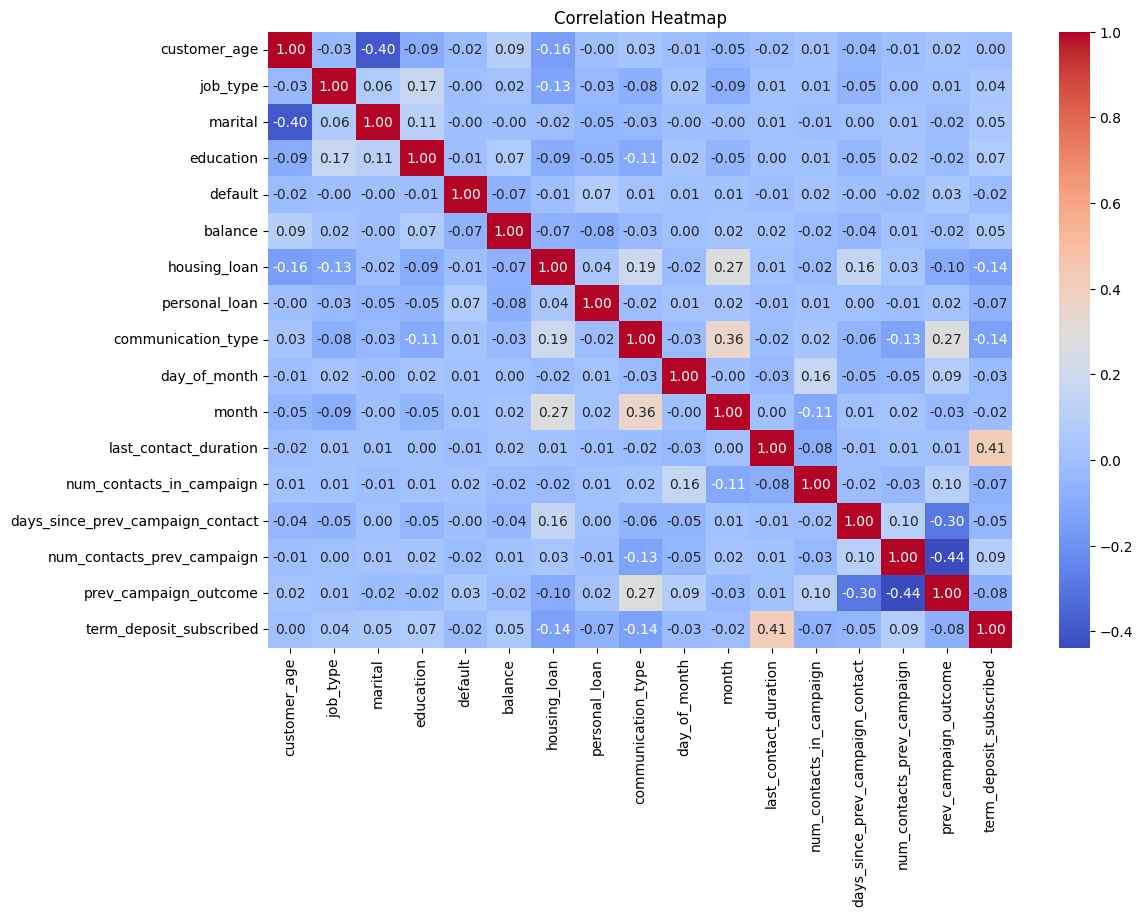

In [31]:
# Correlation heatmap of train dataset
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

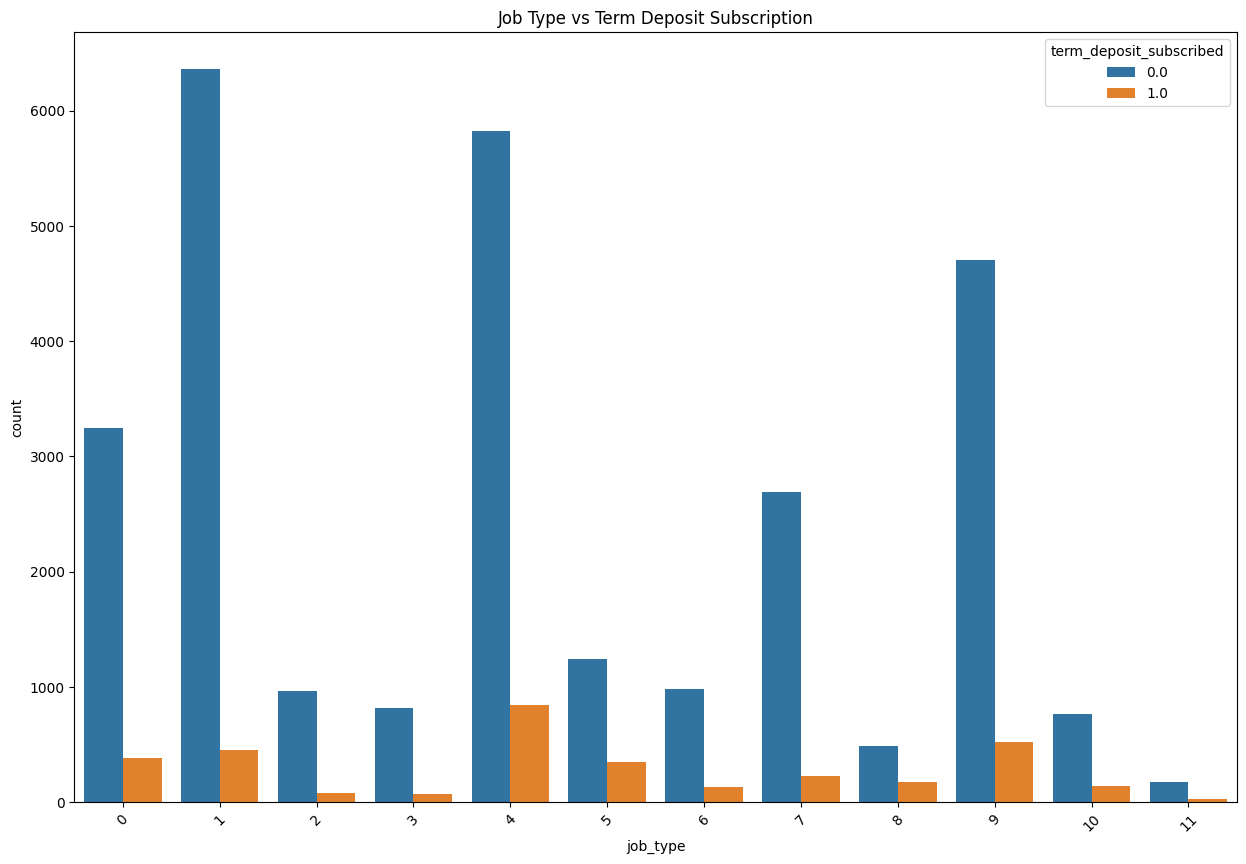

In [32]:
# Countplot for categorical variables of train dataset
plt.figure(figsize=(15, 10))
sns.countplot(x='job_type', hue='term_deposit_subscribed', data=train_df)
plt.xticks(rotation=45)
plt.title('Job Type vs Term Deposit Subscription')
plt.show()

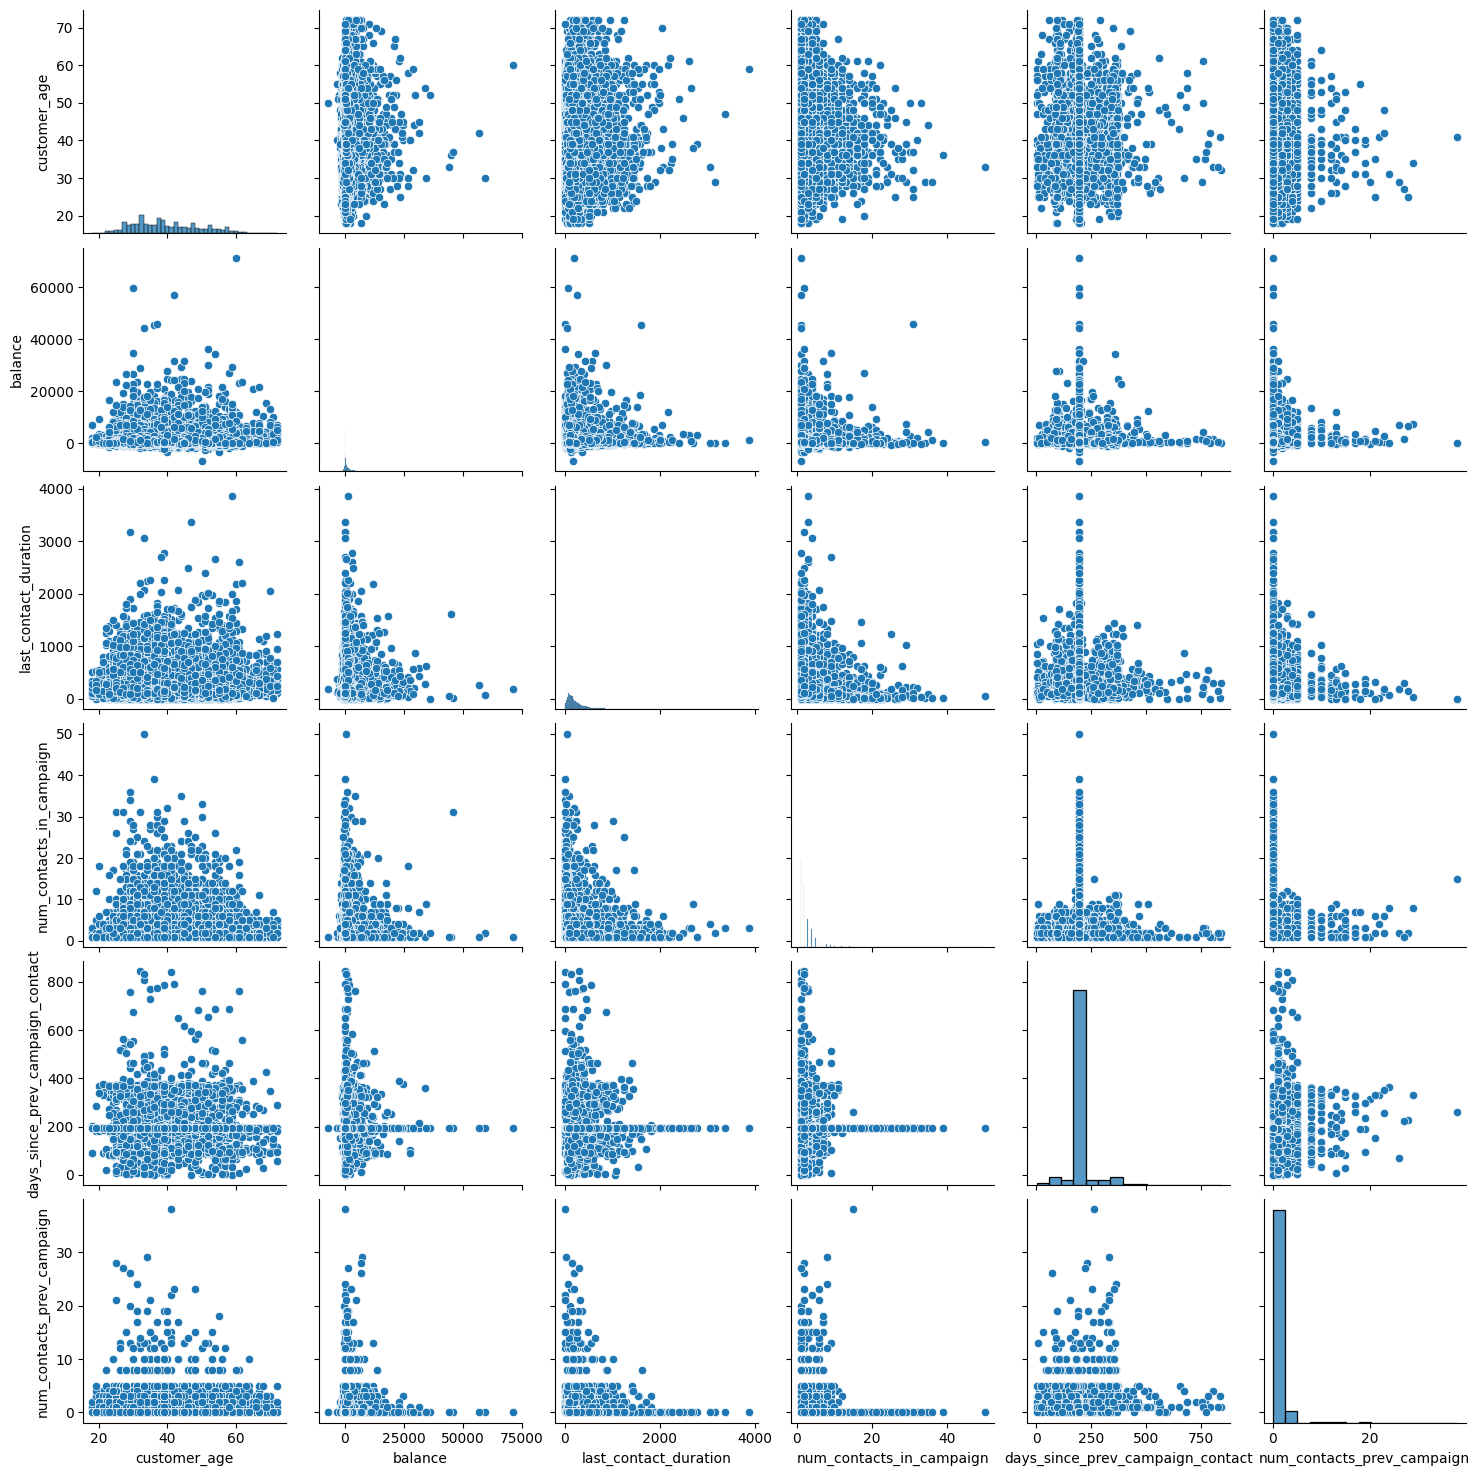

In [33]:
# Pairplot to visualize relationships between numerical variables of test dataset
sns.pairplot(test_df[['customer_age', 'balance', 'last_contact_duration', 'num_contacts_in_campaign', 'days_since_prev_campaign_contact', 'num_contacts_prev_campaign']])
plt.show()

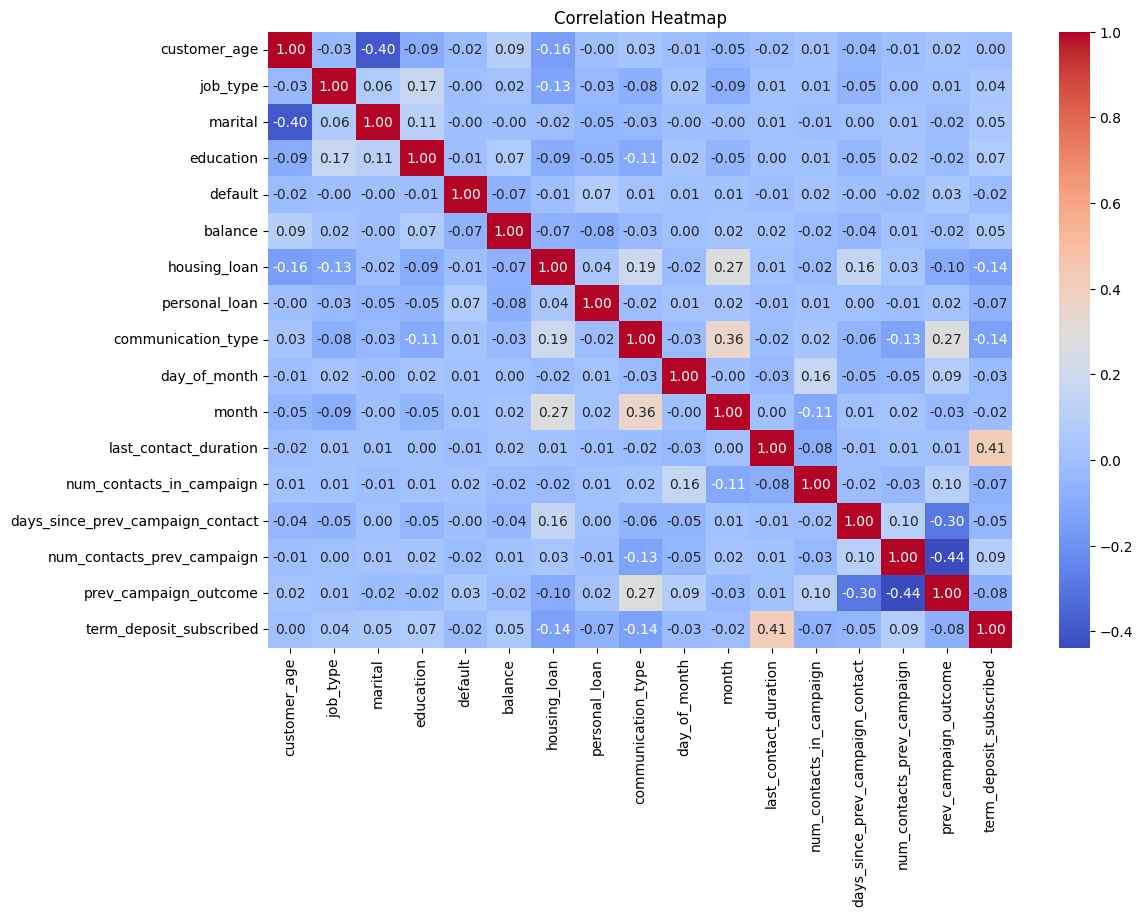

In [34]:
# Correlation heatmap of test dataset
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

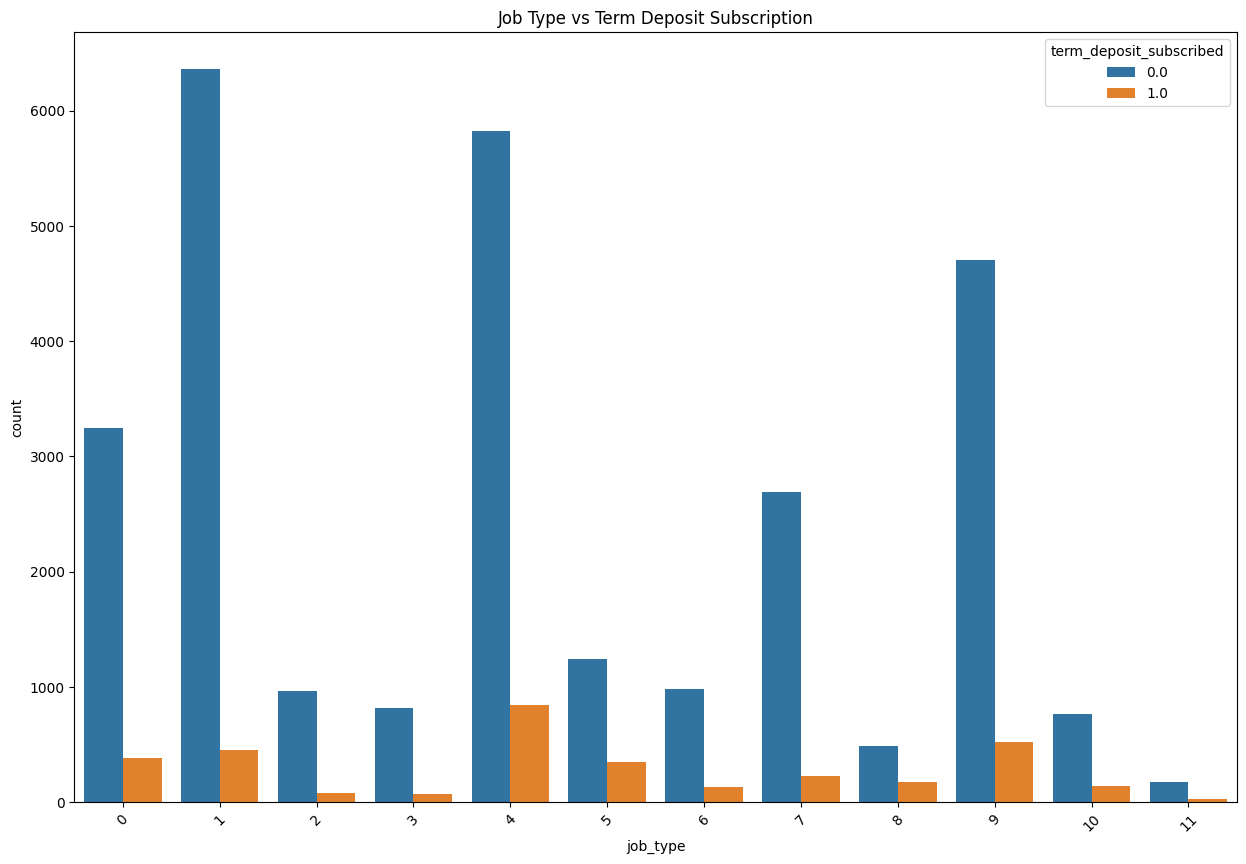

In [35]:
# Countplot for categorical variables of test dataset
plt.figure(figsize=(15, 10))
sns.countplot(x='job_type', hue='term_deposit_subscribed', data=train_df)
plt.xticks(rotation=45)
plt.title('Job Type vs Term Deposit Subscription')
plt.show()

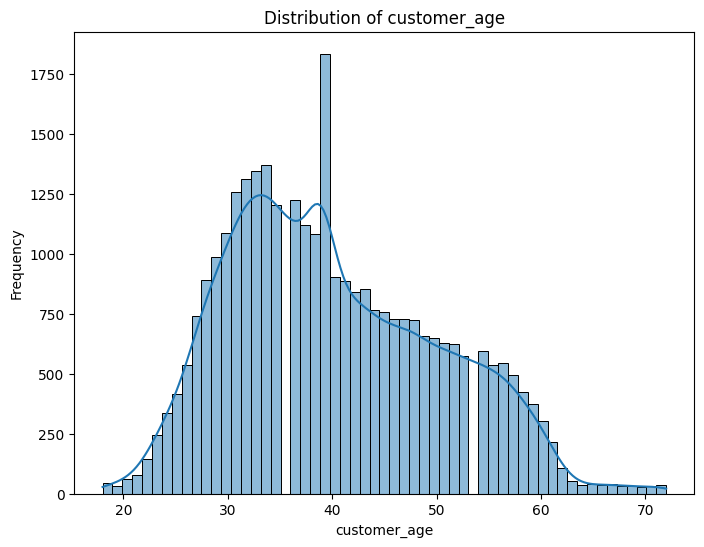

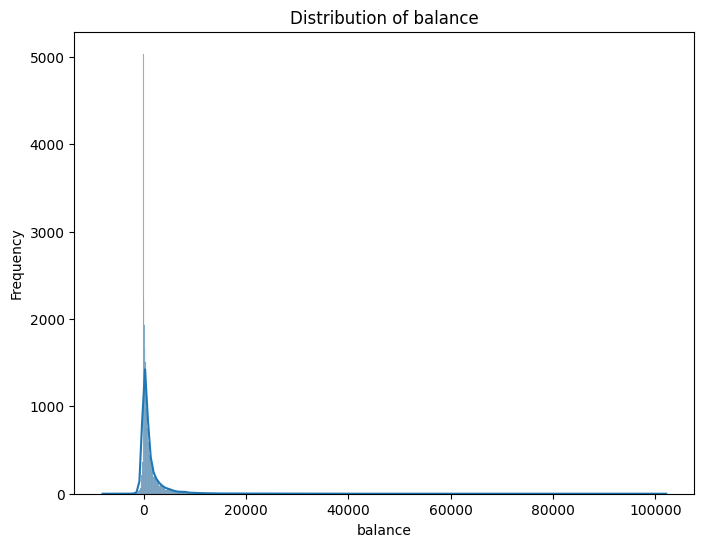

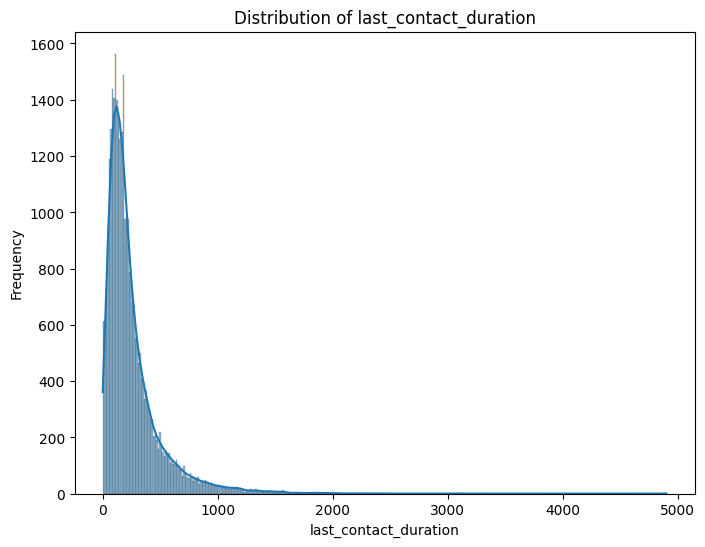

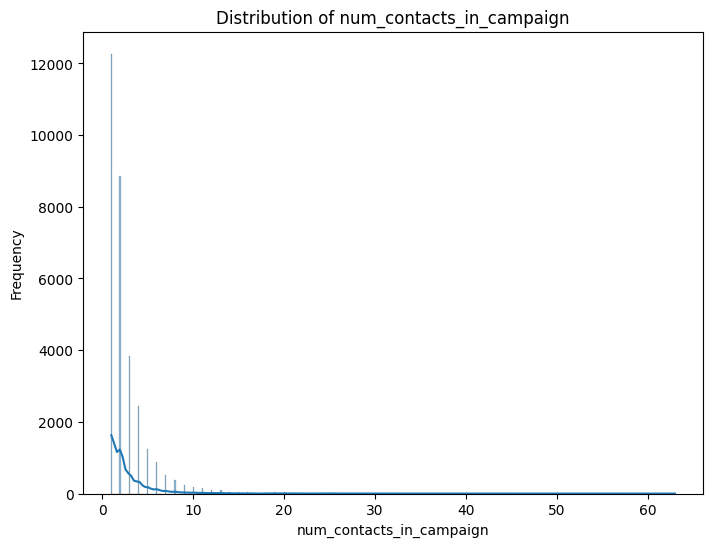

In [36]:
# Explore distributions of numerical variables in train dataset
numeric_features = ['customer_age', 'balance', 'last_contact_duration', 'num_contacts_in_campaign']

for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(train_df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

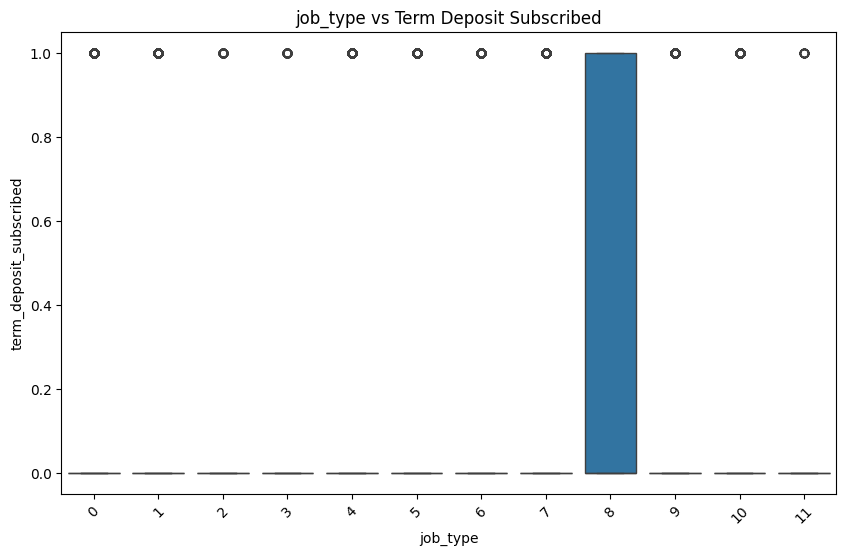

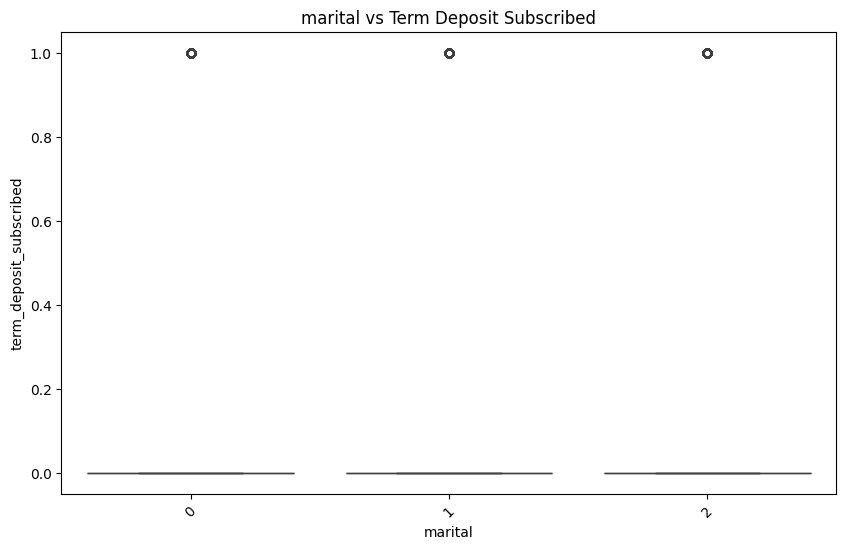

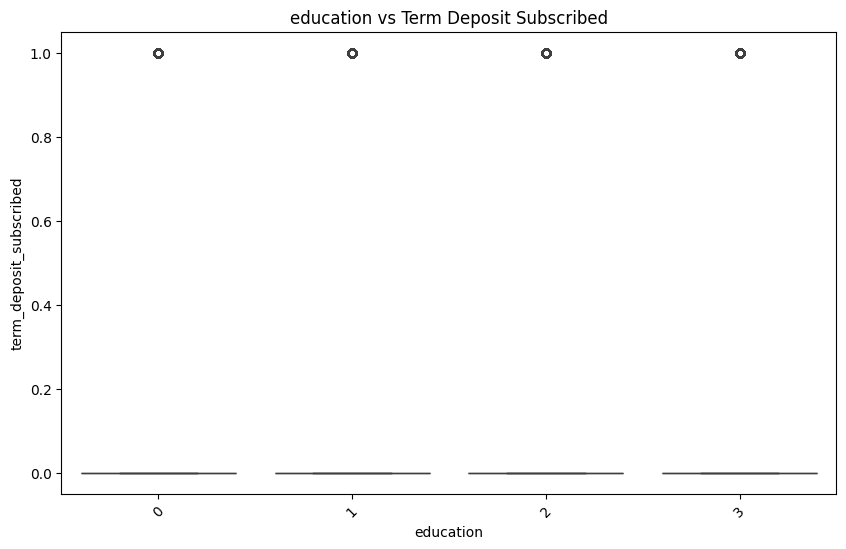

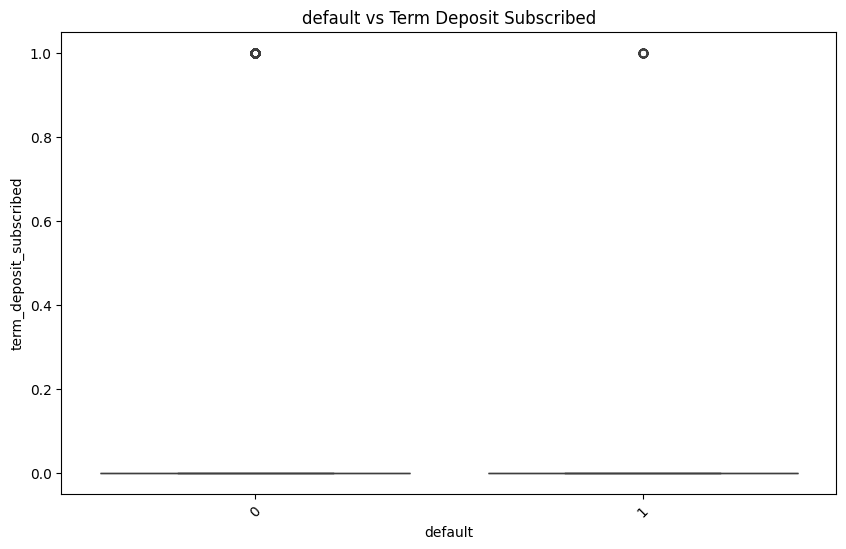

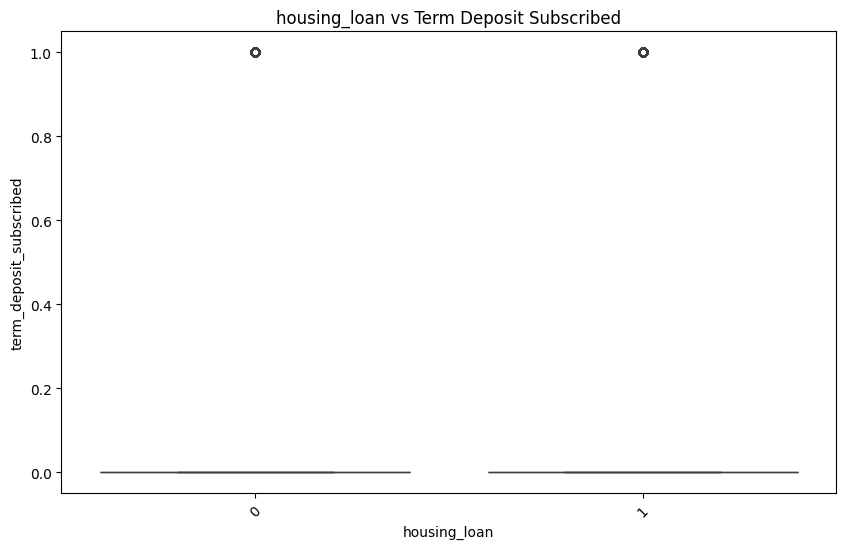

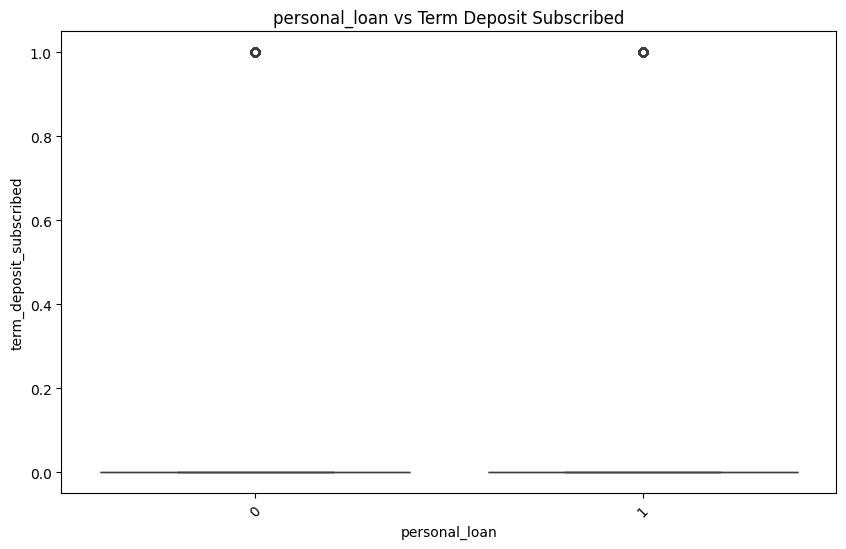

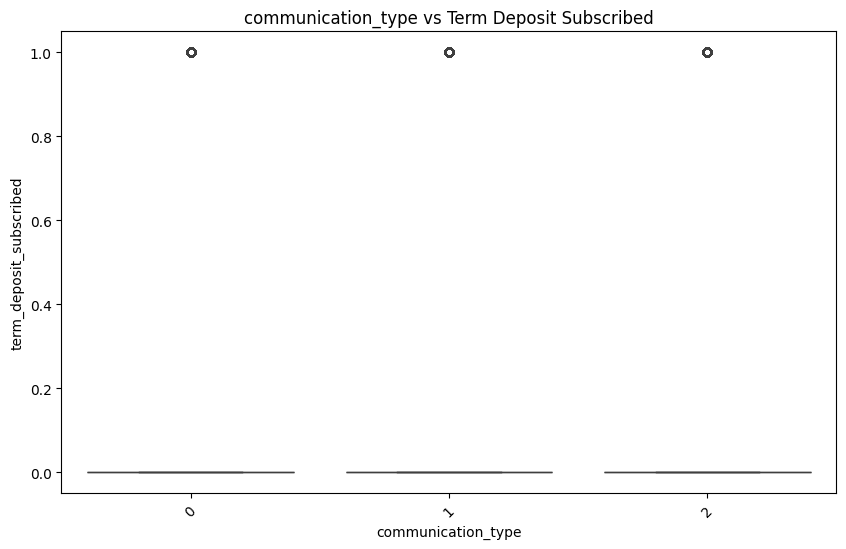

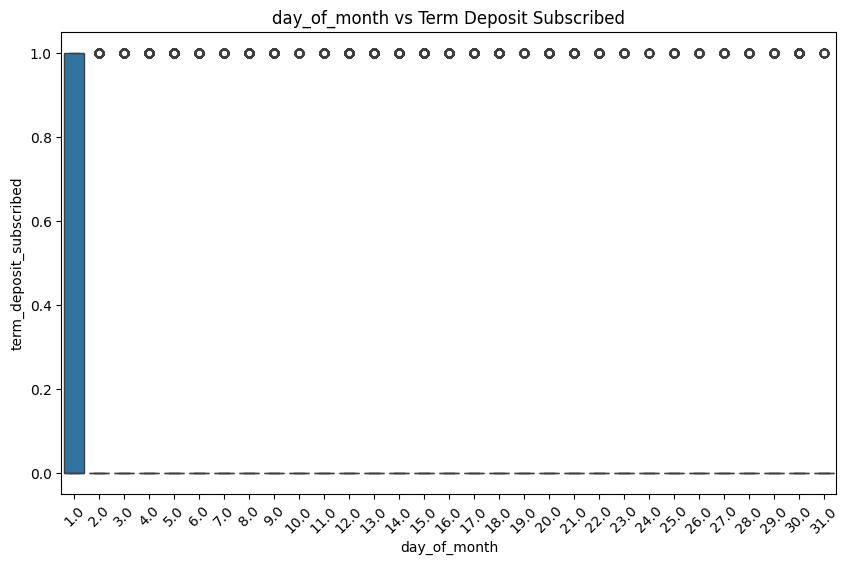

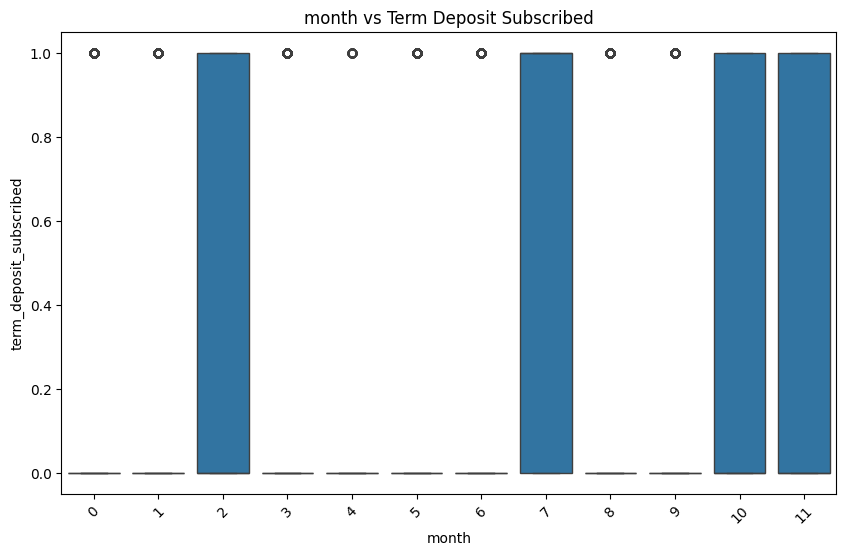

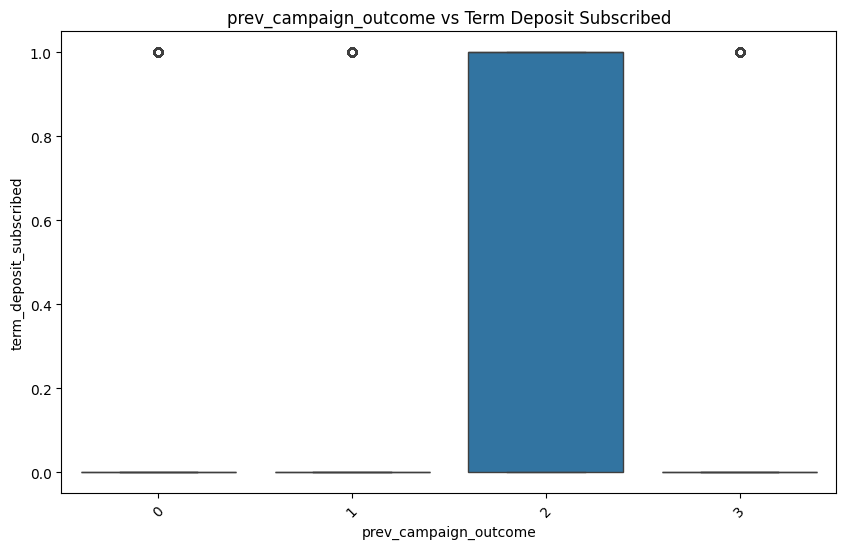

In [37]:
# Box plot for categorical variables vs target variable of train dataset
cat_vars = ['job_type', 'marital', 'education', 'default', 'housing_loan', 'personal_loan', 'communication_type', 'day_of_month', 'month', 'prev_campaign_outcome', 'term_deposit_subscribed']
for var in cat_vars[:-1]:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=var, y='term_deposit_subscribed', data=train_df)
    plt.title(f'{var} vs Term Deposit Subscribed')
    plt.xticks(rotation=45)
    plt.show()

Feature Selection

In [38]:
# Select relevant features for clustering
features = ['customer_age', 'balance', 'last_contact_duration', 'num_contacts_in_campaign']
# Prepare data for clustering
X_train = train_df[features]
X_test = test_df[features]

Feature Scaling

In [39]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Dimentionality Reduction

In [40]:
# Dimensionality reduction using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

Algorithm Selection

In [41]:
# Initialize KMeans clustering algorithm
from sklearn.cluster import KMeans

Model Training


In [42]:
# Train K-means clustering model
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_train_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

Cluster Assignment

In [43]:
# Assign clusters to train and test data
train_clusters = kmeans.predict(X_train_scaled)
test_clusters = kmeans.predict(X_test_scaled)

Cluster Visualization

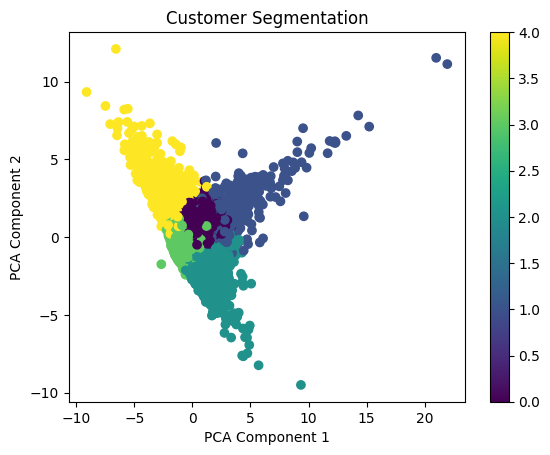

In [44]:
# visualizing clusters using scatter plots
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=train_clusters, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Customer Segmentation')
plt.colorbar()
plt.show()

In [45]:
# Add cluster labels to original datasets
train_df['cluster'] = train_clusters
test_df['cluster'] = test_clusters

In [46]:
# Analyze characteristics of each segment
segment_analysis = train_df.groupby('cluster').mean()
segment_analysis

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
cluster,,,,,,,,,,,,,,,,,
0,51.242069,4.240676,0.910592,1.131875,0.015216,1108.249329,0.470114,0.170363,0.676082,15.639383,5.396818,195.886822,2.392442,197.449826,0.491497,2.586773,0.073794
1,42.585912,4.566702,1.160085,1.433298,0.000000,13769.577375,0.439701,0.053362,0.542156,15.804696,5.848453,233.494130,2.391676,192.803629,0.548559,2.521878,0.127001
2,39.058780,4.339824,1.170830,1.229243,0.015062,1200.330639,0.591844,0.156870,0.609478,15.621234,5.536370,885.824394,2.400073,198.415503,0.519104,2.619765,0.468038
3,33.483879,4.350803,1.312255,1.265199,0.019572,857.647234,0.615883,0.157704,0.622844,15.603748,5.660381,197.034979,2.236109,201.637478,0.595836,2.505473,0.073409
4,39.654497,4.389136,1.175423,1.270703,0.026714,854.904720,0.531612,0.172752,0.786287,21.128228,4.560997,137.743544,14.756011,195.809439,0.140695,2.929653,0.022262
